In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
import warnings
warnings.filterwarnings('ignore')

#### MovieLens 데이터 분석

In [2]:
# 1번째 데이터 읽기.
# pd.io.parsers.read_csv() : csv 확장자가 아닌 데이터를 가져올 수 있음.
rating_data = pd.io.parsers.read_csv('data10/ml-1m/ratings.dat', names=['user_id', 'movie_id', 'rating', 'time'], delimiter='::' )
rating_data.head()

,user_id,movie_id,rating,time
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [3]:
# 2번째 데이터 읽기.
movie_data = pd.io.parsers.read_csv('data10/ml-1m/movies.dat', names=['movie_id', 'title', 'genre'], delimiter='::' )
movie_data.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# 3번째 데이터 읽기.
user_data = pd.io.parsers.read_csv('data10/ml-1m/users.dat', names=['user_id', 'gender', 'age', 'occupation', 'zipcode'], 
                                    delimiter='::' )
user_data.head()

,user_id,gender,age,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
# 결측치 확인.
print(rating_data.isna().sum())
print('')
print(movie_data.isna().sum())
print('')
print(user_data.isna().sum())

user_id     0
movie_id    0
rating      0
time        0
dtype: int64

movie_id    0
title       0
genre       0
dtype: int64

user_id       0
gender        0
age           0
occupation    0
zipcode       0
dtype: int64


In [6]:
# 전체 영화 데이터의 Row의 개수.
print(f'전체 영화 Data row 개수 : {len(movie_data)}개')

# 전체 영화로부터 movie_id의 중복을 제외한 Row의 개수.
print(f'전체 영화중 중복을 제외한 Data row 개수 : {len(movie_data["movie_id"].unique())}개')

전체 영화 Data row 개수 : 3883개
전체 영화중 중복을 제외한 Data row 개수 : 3883개


In [7]:
# 년도별 영화 수를 가져옴.
# movie_data['title'][0][-5 : -1]
movie_data['Year'] = movie_data['title'].apply(lambda x : x[-5 : -1])
movie_data['Year'].value_counts().sort_index()

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: Year, Length: 81, dtype: int64

In [8]:
# 각 영화의 연대별 개수. => 변수명 : Year_term으로 지정.
movie_data['Year_term'] = movie_data['Year'].apply(lambda x : x[-4 : -1] + '0')
movie_year_term = movie_data['Year_term'].value_counts().sort_index()
movie_year_term

1910       3
1920      34
1930      77
1940     126
1950     168
1960     191
1970     247
1980     598
1990    2283
2000     156
Name: Year_term, dtype: int64

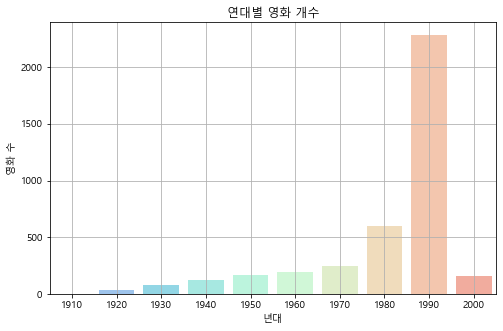

In [9]:
# 연도별 영화 수에 대한 시각화.
plt.figure(figsize=(8,5))
sb.barplot(movie_year_term.index, movie_year_term.values, palette='rainbow', alpha=.5)
plt.title('연대별 영화 개수')
plt.xlabel('년대')
plt.ylabel('영화 수')
plt.grid()
plt.show()

In [10]:
# 가장 많이 사용된 장르의 조합을 출력.
movie_data['genre'].value_counts

# 가장 많이 등장한 장르 속성을 추출.
# 장르를 담을 딕셔너리 생성.
genre_dic = {}

# 영화의 수 만큼 반복하면서 장르를 추출.
for genre in movie_data['genre'] :
    # print(genre)
    
    # '|' 기준으로 문자열 Split.
    parsed_genre = genre.split('|')
    #print(parsed_genre)
    
    for name in parsed_genre :
        # print(name)
        
        # 해당 장르로 저장된 것이 없을 경우.
        if genre_dic.get(name) == None :
            genre_dic[name] = 1
        
        # 해당 장르로 저장된 것이 있을 경우.
        else :
            genre_dic[name] += 1

print(genre_dic)

{'Animation': 105, "Children's": 251, 'Comedy': 1200, 'Adventure': 283, 'Fantasy': 68, 'Romance': 471, 'Drama': 1603, 'Action': 503, 'Crime': 211, 'Thriller': 492, 'Horror': 343, 'Sci-Fi': 276, 'Documentary': 127, 'War': 143, 'Musical': 114, 'Mystery': 106, 'Film-Noir': 44, 'Western': 68}


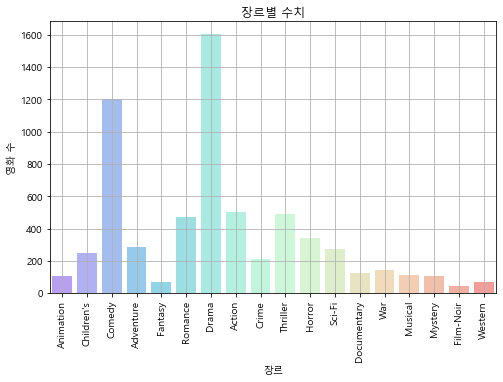

In [11]:
# 장르 속성에 대한 시각화.
plt.figure(figsize=(8,5))
sb.barplot(list(genre_dic.keys()), list(genre_dic.values()), palette='rainbow', alpha=.5)
plt.title('장르별 수치')
plt.xlabel('장르')
plt.ylabel('영화 수')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [12]:
# 전체 사용자 수 파악.
print(f'사용자 전체 row의 수 : {len(user_data)}명')

# 전체 user_id 중 중복된 것을 제외한 Row의 수.
print(f'사용자 전체중 중복을 제외한 row의 수 : {len(user_data["user_id"].unique())}명')

사용자 전체 row의 수 : 6040명
사용자 전체중 중복을 제외한 row의 수 : 6040명


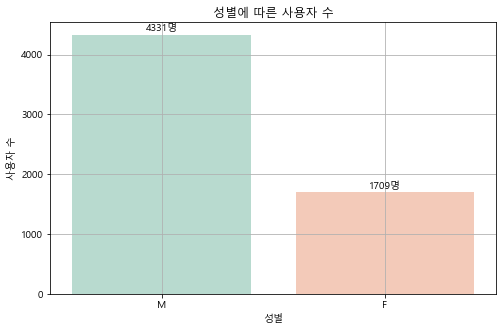

In [13]:
# 성별에 따른 사용자 수를 시각화.
user_gender = user_data['gender'].value_counts()
plt.figure(figsize=(8,5))
sb.barplot(user_gender.index, user_gender.values, palette='Set2', alpha=.5)
plt.text(0, 4450, f'{user_gender[0]}명', va='center', ha='center')
plt.text(1, 1800, f'{user_gender[1]}명', va='center', ha='center')
plt.title('성별에 따른 사용자 수')
plt.xlabel('성별')
plt.ylabel('사용자 수')
plt.grid()
plt.show()

In [14]:
# 연령대별 사용자수를 시각화.
# 9세 이하는 이상치로 취급.

# 연령대 구별 함수 생성.
def age_classification(age) :
    if age < 10 :
        return '이상치'
    else :
        return f'{str(age//10 *10)}대'
age_classification(26)

'20대'

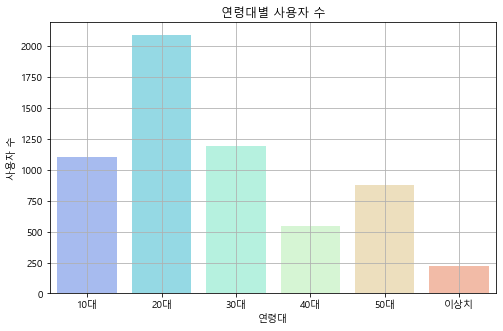

In [15]:
user_data['연령대'] = user_data['age'].apply(lambda x : age_classification(x))
user_ages = user_data['연령대'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sb.barplot(user_ages.index, user_ages.values, palette='rainbow', alpha=.5)
plt.title('연령대별 사용자 수')
plt.xlabel('연령대')
plt.ylabel('사용자 수')
plt.grid()
plt.show()

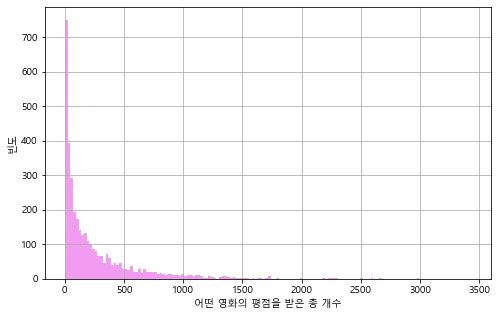

In [16]:
# movie_id(익명으로 나타난 영화들)에 따른 평가 개수에 대한 분포 시각화.
rate_cnt = rating_data.groupby('movie_id')['rating'].count().values
plt.figure(figsize=(8,5))
plt.hist(rate_cnt, bins=150, alpha=.8, color='violet')
plt.xlabel('어떤 영화의 평점을 받은 총 개수')
plt.ylabel('빈도')
plt.grid()
plt.show()

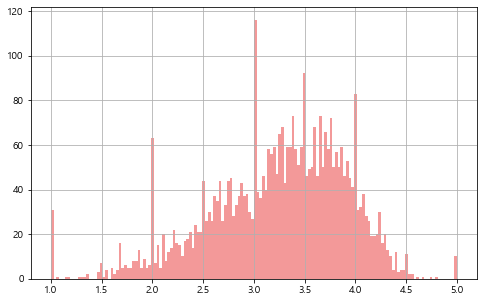

In [17]:
# 영화별 평균 평점.
movie_grouped_rating_info = rating_data.groupby('movie_id')['rating'].agg(['count', 'mean'])
movie_grouped_rating_info.columns = ['rated_cnt', 'rated_mean']
movie_grouped_rating_info.head()


# 영화별로 평가한 평균 영화 점수 시각화. 
plt.figure(figsize=(8,5))
movie_grouped_rating_info['rated_mean'].hist(bins=150, alpha=.8, color='lightcoral')
plt.show()

In [18]:
# 100번 이상의 평가를 받은 영화 중, 평점이 높은 10개의 영화를 가져옴.
# 평점 평균 정보와 영화 정보를 합침.
# on : 지정된 컬럼의 값이 같은 것만을 가져옴.
# how : left, right 결측치로 설정할 데이터 프레임 지정.
movie_merge = movie_grouped_rating_info.merge(movie_data, on='movie_id', how='left')
movie_100 = movie_merge.query('100 <= rated_cnt')
movie_100.sort_values(by='rated_mean', ascending=False, inplace=True)
movie_100[['title','rated_mean']].head(10)

,title,rated_mean
1839,Seven Samurai (The Magnificent Seven) (Shichin...,4.560510
309,"Shawshank Redemption, The (1994)",4.554558
802,"Godfather, The (1972)",4.524966
708,"Close Shave, A (1995)",4.520548
49,"Usual Suspects, The (1995)",4.517106
513,Schindler's List (1993),4.510417
1066,"Wrong Trousers, The (1993)",4.507937
861,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.491489
1108,Raiders of the Lost Ark (1981),4.477725
843,Rear Window (1954),4.476190


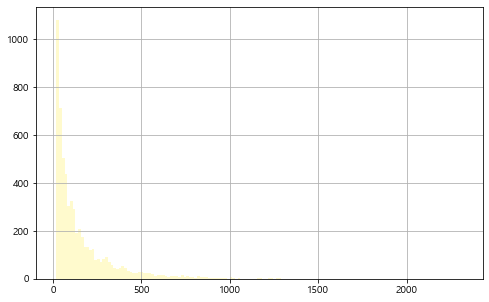

In [19]:
# 유저별로 평가한 영화 개수 시각화.
user_grouped_rating_info = rating_data.groupby('user_id')['rating'].agg(['count', 'mean', 'std'])
user_grouped_rating_info.columns = ['rated_cnt', 'rated_mean', 'rated_std']
plt.figure(figsize=(8,5))
user_grouped_rating_info['rated_cnt'].hist(bins=150, color='lemonchiffon')
plt.show()

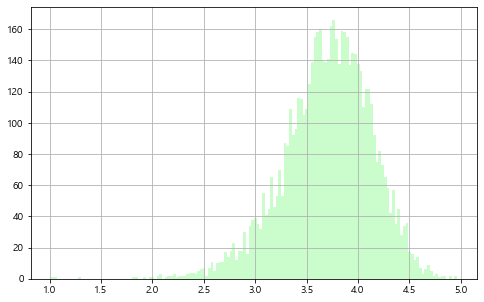

In [20]:
# 유저별로 평가한 평균 영화 점수 시각화.
plt.figure(figsize=(8,5))
user_grouped_rating_info['rated_mean'].hist(bins=150, color='palegreen', alpha=.5)
plt.show()

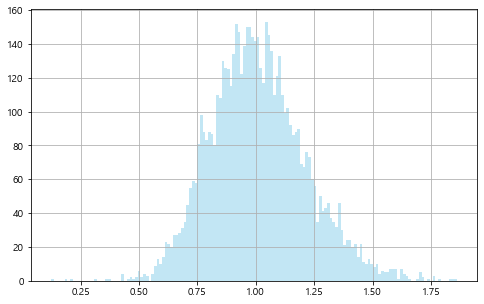

In [21]:
# 유저별로 평가한 영화 점수 표준편차 시각화.
plt.figure(figsize=(8,5))
user_grouped_rating_info['rated_std'].hist(bins=150, color='skyblue', alpha=.5)
plt.show()

In [22]:
# unstack() 함수로 user_id, movie_id를 축으로 하는 데이터를 생성.
a = rating_data[['user_id', 'movie_id', 'rating']]
b = a.set_index(['user_id', 'movie_id'])
rating_table = b.unstack()
rating_table.head()

rating                                               ...            \
movie_id   1    2    3    4    5    6    7    8    9    10    ... 3943 3944   
user_id                                                       ...             
1           5.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
2           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
3           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
4           NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN   
5           NaN  NaN  NaN  NaN  NaN  2.0  NaN  NaN  NaN  NaN  ...  NaN  NaN   

                                                  
movie_id 3945 3946 3947 3948 3949 3950 3951 3952  
user_id                                           
1         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
5         NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 3706 columns]

#### 수학적 기법을 활용한 평점 예측 모델
- pip install surprise : 추천 시스템 패키지.

In [23]:
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

In [24]:
# 평점 정보 확인.
rating_data['rating'].agg(['min', 'max'])

min    1
max    5
Name: rating, dtype: int64

In [25]:
# Reader() : 데이터를 읽어들이기 위한 객체.
reader = Reader(rating_scale=(1, 5))

# 데이터 생성.
a = rating_data[['user_id', 'movie_id', 'rating']]
data = Dataset.load_from_df(a, reader)

# surprise 라이브러리가 인식할 수 있는 학습 데이터셋을 구성.
train_data = data.build_full_trainset()
# 학습한 모델을 기반으로 빈공간의 점수를 예측.
# build_anti_testset() : 학습에 사용된 데이터에서 0으로 평가되어 있는 부분의 데이터. 
# user 혹은 item은 학습에 반드시 등장한 적이 있어야 한다는 전제 조건을 필요.
# 여기서는 특정 사용자가 보지 않은 영화에 대한 평점을 이룰 예정이니 필요 없음.

# SVD(Singular Value Decomposition) : 특이값 분해 알고리즘 모델 기반의 학습.
train_start = time.time()

model = SVD(n_factors=8, lr_all=0.005, reg_all=0.02, n_epochs=100)
model.fit(train_data)

train_end = time.time()

print(f'총 학습시간 : {round(train_end - train_start, 3)}초')

총 학습시간 : 53.83초


In [26]:
# 예측할 사용자 선정.
# user_id가 7인 유저의 영화 평가데이터.
target_user_id = 7
target_user_data = rating_data[ rating_data['user_id'] == target_user_id ]
target_user_data

,user_id,movie_id,rating,time
523,7,648,4,978234737
524,7,861,4,978234874
525,7,2916,5,978234842
526,7,3578,3,978234737
527,7,3793,3,978234737
528,7,1610,5,978234786
529,7,589,5,978234786
530,7,6,4,978234842
531,7,442,4,978234632
532,7,733,5,978234842


In [27]:
# 사용자 7인 평점 내린 영화 인덱스를 추출.
a = target_user_data[['movie_id', 'rating']]

# 사용자 7의 평가를 담을 딕셔너리
target_user_movie_rating_dict = {}

for idx, row in a.iterrows() :
    movie_id = row['movie_id']
    # print(row['rating'])
    target_user_movie_rating_dict[movie_id] = row['rating']
    
print(target_user_movie_rating_dict)

{648: 4, 861: 4, 2916: 5, 3578: 3, 3793: 3, 1610: 5, 589: 5, 6: 4, 442: 4, 733: 5, 377: 3, 2353: 5, 1196: 5, 2571: 5, 380: 5, 1997: 5, 1270: 4, 457: 5, 1573: 4, 3753: 4, 3107: 3, 474: 5, 1722: 4, 3256: 5, 1580: 4, 110: 5, 1221: 4, 2028: 5, 480: 4, 349: 5, 3418: 3}


In [28]:
# 7번 사용자가 보지 않은 영화 인덱스를 담을 리스트 생성.
test_data = []

for index, row in movie_data.iterrows() :
    # 영화 id를 추출.
    movie_id = row['movie_id']
    
    # 7번 사용자가 이 영화에 대해 평점을 주지 않았다면 리스트에 담기.
    if movie_id not in target_user_movie_rating_dict :
        # 7번 사용자, movie_id, 평점
        test_data.append((target_user_id, movie_id, 0))   
        
# 상위 5개만 추출.
test_data[:5]

[(7, 1, 0), (7, 2, 0), (7, 3, 0), (7, 4, 0), (7, 5, 0)]

In [29]:
# 점수 예측.
target_user_predictions = model.test(test_data)
# target_user_predictions

# 우선 상위 10개만 가져와서 확인.
for _, movie_id, _, rating, _ in target_user_predictions[:10] :
    # print(f'{movie_id} : {rating}')
    a = movie_data.query(f'movie_id == {movie_id}')
    title = a['title'].values[0]
    print(f'{title} : {round(rating, 1)}점')

Toy Story (1995) : 4.1점
Jumanji (1995) : 3.5점
Grumpier Old Men (1995) : 3.5점
Waiting to Exhale (1995) : 2.5점
Father of the Bride Part II (1995) : 3.1점
Sabrina (1995) : 3.6점
Tom and Huck (1995) : 3.7점
Sudden Death (1995) : 3.9점
GoldenEye (1995) : 4.4점
American President, The (1995) : 4.0점


In [30]:
# 예측된 점수를 통해 데이터 프레임을 생성.
predict_dict = {
                'movie_id' : [],
                'rating'   : []
               }

# 해당 딕셔너리에 예측 평점 담기.
for _, movie_id, _, rating, _ in target_user_predictions :
    predict_dict['movie_id'].append(movie_id)
    predict_dict['rating'].append(round(rating, 1))
# print(predict_dict)

predict_df = pd.DataFrame(predict_dict)
predict_df.sort_values(by='rating', inplace=True, ascending=False)

# 평점에 따른 영화 10개를 추천.
top10 = predict_df.head(10)
# top10

# 추출한 상위 10개 영화의 movie_id를 추출.
idx = top10['movie_id'].values

# 추천된 상위 10개 영화 제목을 담을 리스트 생성.
movie_name = []

# 추출한 10개의 영화 수 만큼 반복.
for movie_id in idx :
    # 추천된 id의 영화 이름을 추출해 출력.
    a = movie_data.query(f'movie_id == {movie_id}')
    # print(a['title'].values[0])
    movie_name.append(a['title'].values[0])

movie_name_df = pd.DataFrame(movie_name)
movie_name_df.columns = ['movie_name']
movie_name_df.index = top10.index.values
pd.concat([movie_name_df, top10], axis=1)

,movie_name,movie_id,rating
2038,"Saltmen of Tibet, The (1997)",2129,5.0
888,"Maltese Falcon, The (1941)",913,5.0
2853,Goldfinger (1964),2947,5.0
1247,High Noon (1952),1283,5.0
2968,"Longest Day, The (1962)",3062,5.0
789,"Bewegte Mann, Der (1994)",811,5.0
1166,Raiders of the Lost Ark (1981),1198,5.0
899,2001: A Space Odyssey (1968),924,5.0
2854,From Russia with Love (1963),2948,5.0
1236,Patton (1970),1272,5.0
